In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("../data/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [59]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [18]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

## EDA

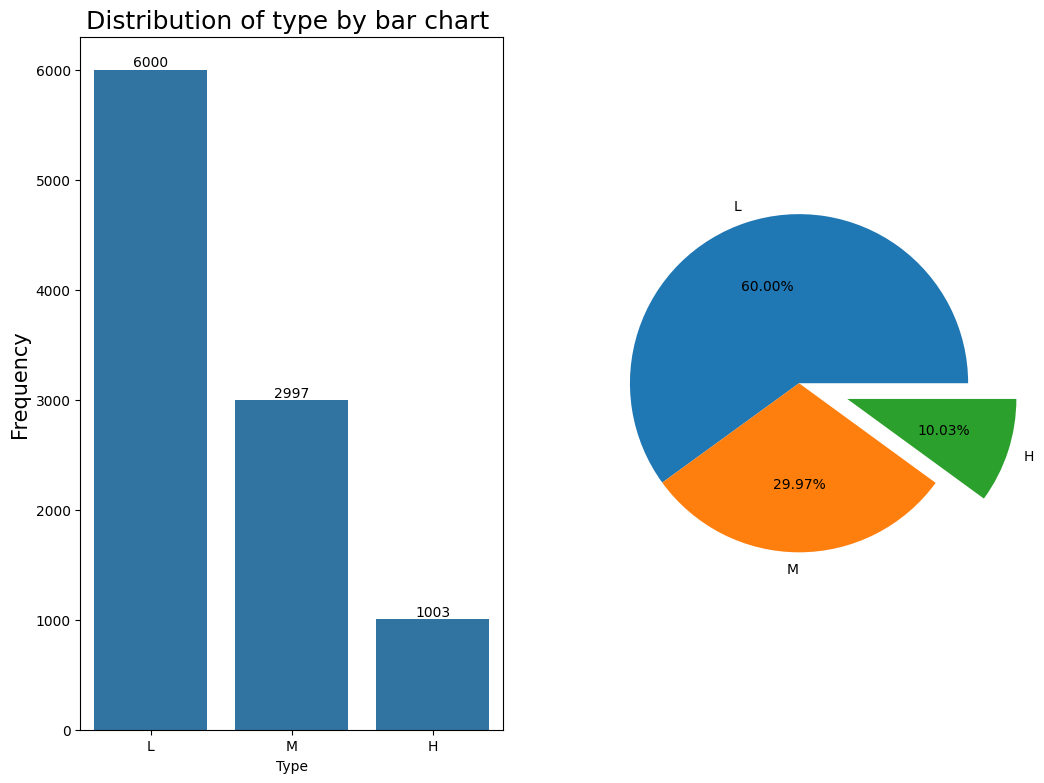

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 9))

ax[0].set_title("Distribution of type by bar chart ", fontdict={"size": 18})
figure = sns.countplot(x = df.Type, ax=ax[0], order=["L", "M", "H"])

for container in figure.containers:
    figure.bar_label(container)

ax[0].set_ylabel("Frequency", fontdict={"size": 15})

ax[1].pie(x=df.Type.value_counts().values, labels=df.Type.value_counts().index, autopct="%1.2f%%", explode=[0,0,0.3])

plt.show()

In [22]:
df.select_dtypes(['float', 'int'])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [23]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


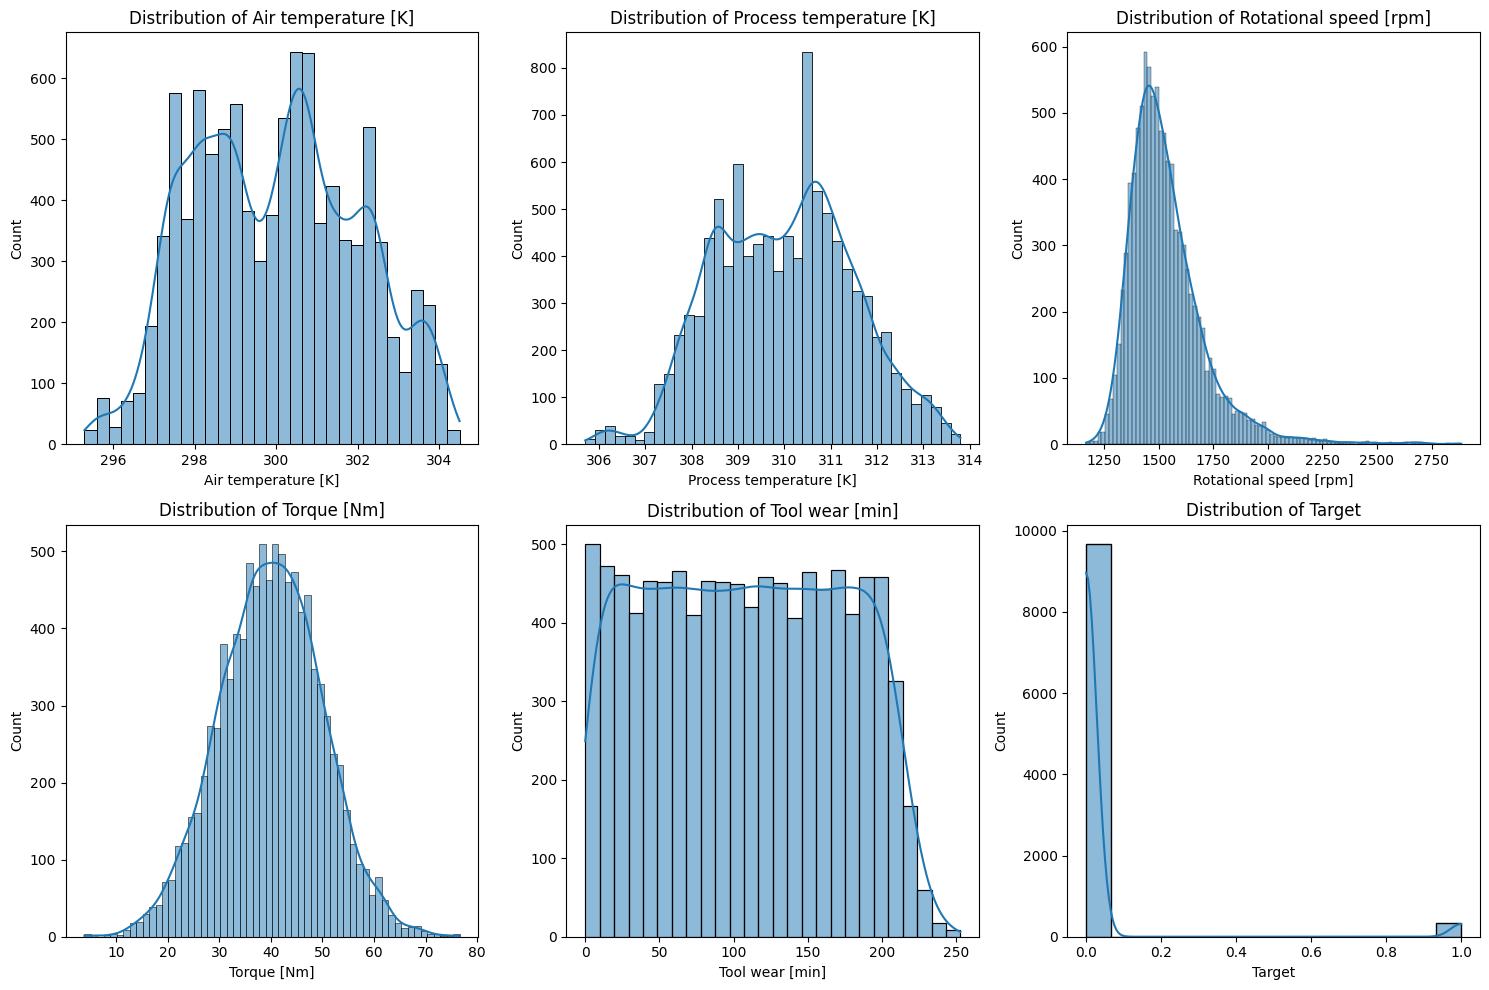

In [24]:
plt.figure(figsize=(15, 10))
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

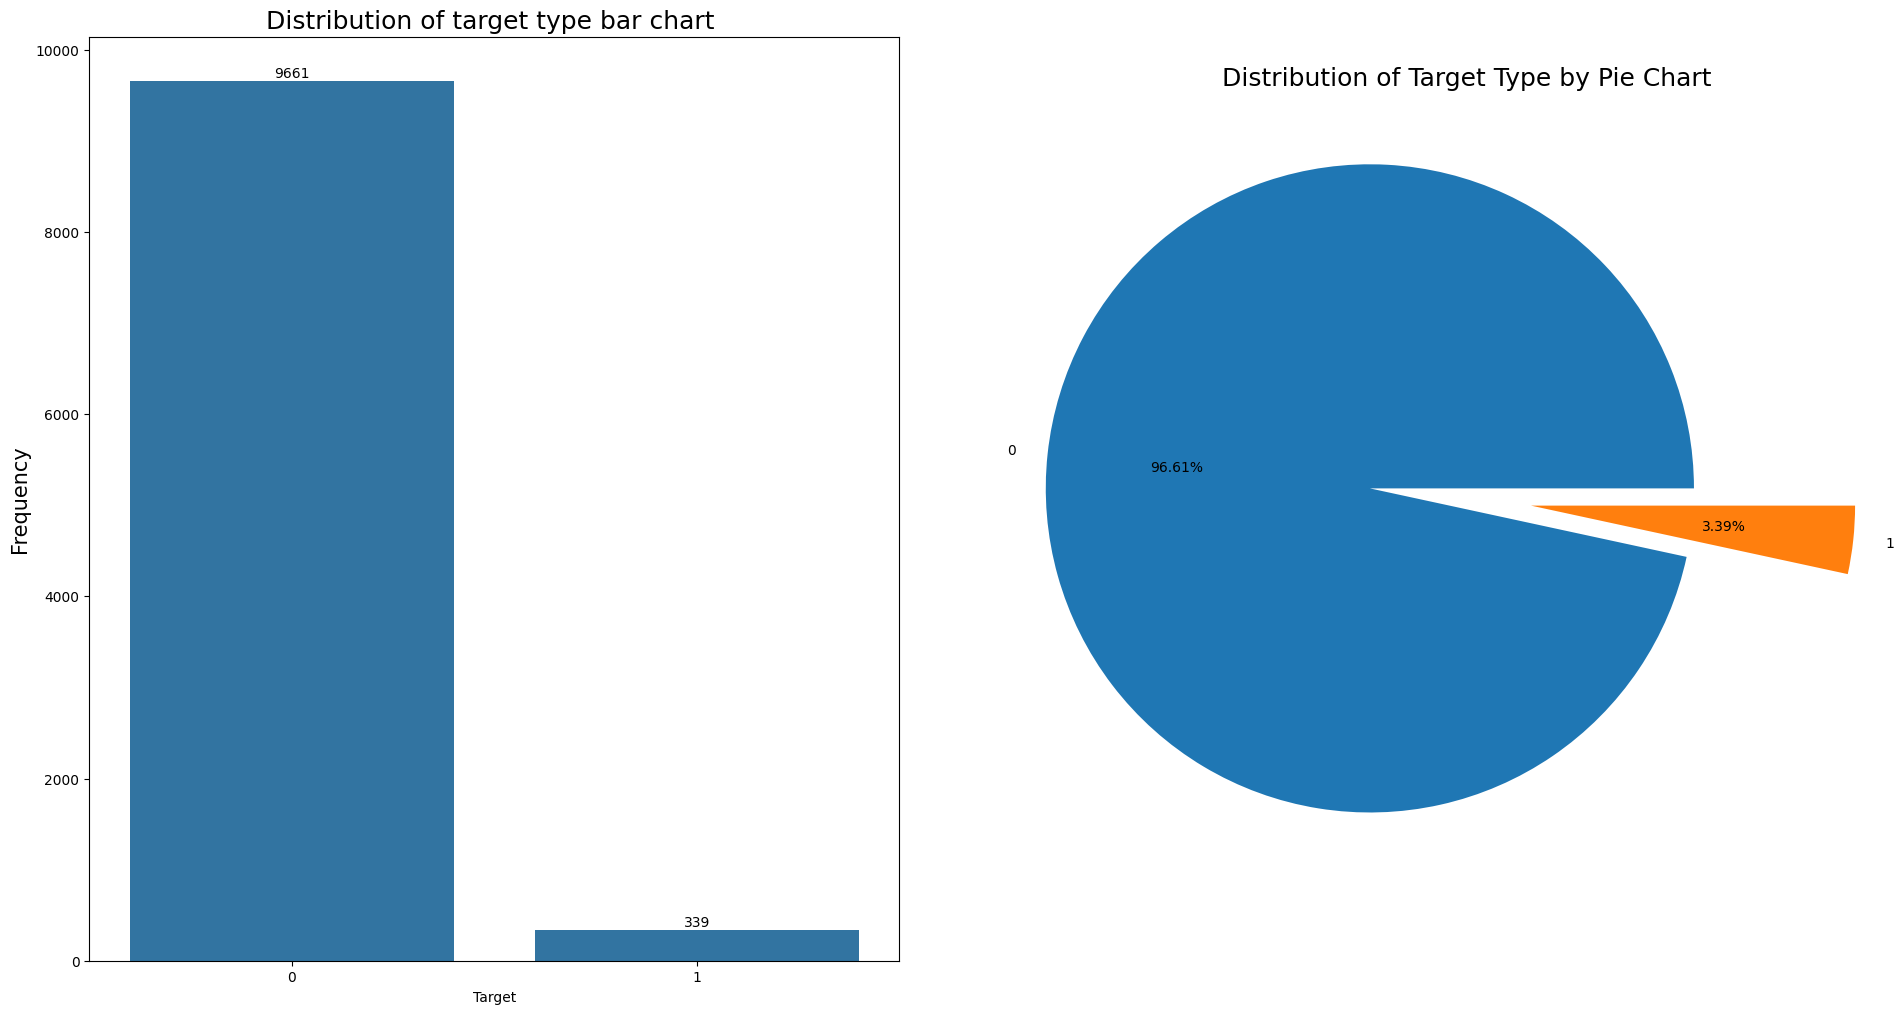

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(23, 12))

ax[0].set_title("Distribution of target type bar chart ", fontdict={"size": 18})
figure = sns.countplot(x = df["Target"], ax=ax[0], order=df["Target"].value_counts().index)

for container in figure.containers:
    figure.bar_label(container)

ax[0].set_ylabel("Frequency", fontdict={"size": 15})

ax[1].set_title("Distribution of Target Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=df["Target"].value_counts().values, labels=df["Target"].value_counts().index, autopct="%1.2f%%", explode=[.3,0.2])

plt.show()

<Figure size 3000x2500 with 0 Axes>

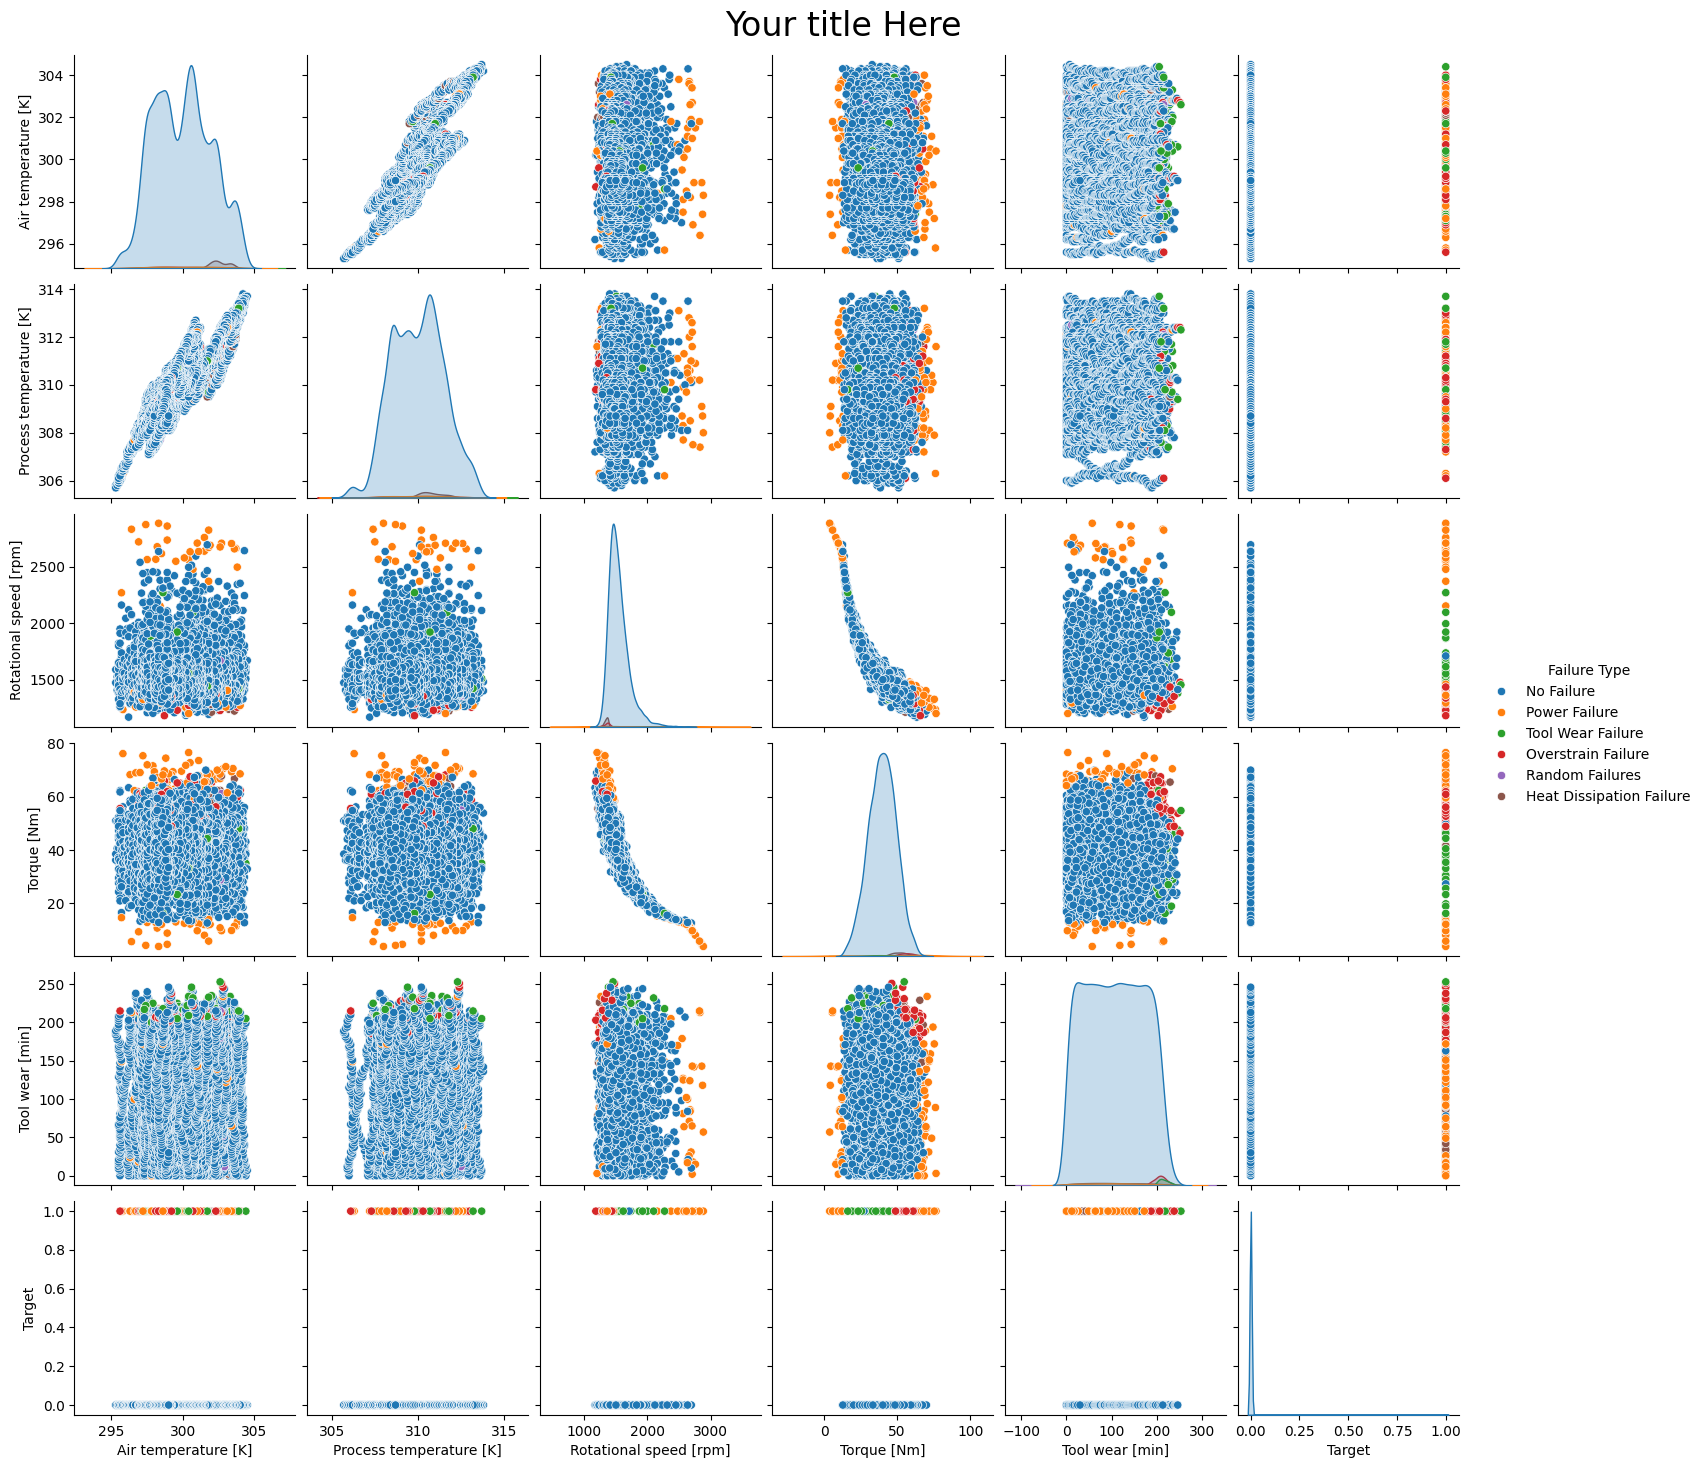

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 25))
pairplot = sns.pairplot(data=df, hue="Failure Type")
pairplot.fig.suptitle("Your title Here", fontsize=24)

pairplot.fig.subplots_adjust(top=0.95)
plt.show()

In [27]:
df.sample()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
5069,M,304.2,313.2,1380,48.7,17,0,No Failure


In [30]:
desc_stats = df.groupby('Failure Type').describe()

In [31]:
print(desc_stats)

                         Air temperature [K]                               \
                                       count        mean       std    min   
Failure Type                                                                
Heat Dissipation Failure               112.0  302.567857  0.604371  300.8   
No Failure                            9652.0  299.972855  1.990937  295.3   
Overstrain Failure                      78.0  299.867949  1.954050  295.6   
Power Failure                           95.0  300.075789  2.147127  295.7   
Random Failures                         18.0  300.766667  1.743222  297.0   
Tool Wear Failure                       45.0  300.288889  1.967026  296.9   

                                                           \
                              25%     50%      75%    max   
Failure Type                                                
Heat Dissipation Failure  302.100  302.45  303.125  303.7   
No Failure                298.300  300.00  301.425  304.5   
O

In [33]:
# Extract statistics for 'No Failure' and other failure types
no_failure_stats = desc_stats.loc['No Failure']
failure_stats = desc_stats.drop('No Failure')

In [34]:
print("No Failure Stats:\n", no_failure_stats)
print("Failure Stats:\n", failure_stats)

No Failure Stats:
 Air temperature [K]      count    9652.000000
                         mean      299.972855
                         std         1.990937
                         min       295.300000
                         25%       298.300000
                         50%       300.000000
                         75%       301.425000
                         max       304.500000
Process temperature [K]  count    9652.000000
                         mean      309.994343
                         std         1.486268
                         min       305.700000
                         25%       308.800000
                         50%       310.000000
                         75%       311.100000
                         max       313.800000
Rotational speed [rpm]   count    9652.000000
                         mean     1540.324389
                         std       167.442595
                         min      1168.000000
                         25%      1429.000000
               

In [37]:
# Example threshold calculation based on the 75th percentile of failure types
threshold = failure_stats.loc[:, (slice(None), '75%')]
print("Thresholds:\n", threshold)

Thresholds:
                          Air temperature [K] Process temperature [K]  \
                                         75%                     75%   
Failure Type                                                           
Heat Dissipation Failure             303.125                  311.30   
Overstrain Failure                   301.150                  311.10   
Power Failure                        301.800                  311.00   
Random Failures                      302.575                  312.05   
Tool Wear Failure                    301.800                  311.30   

                         Rotational speed [rpm] Torque [Nm] Tool wear [min]  \
                                            75%         75%             75%   
Failure Type                                                                  
Heat Dissipation Failure                1363.25       56.35           161.5   
Overstrain Failure                      1382.25       60.60           216.0   
Power Failure  

In [60]:
# Define thresholds for each failure type
thresholds = {
    'Heat Dissipation Failure': {
        'Air temperature [K]': 303.125,
        'Process temperature [K]': 311.30,
        'Rotational speed [rpm]': 1363.25,
        'Torque [Nm]': 56.35,
        'Tool wear [min]': 161.5,
        'Target': 1.0
    },
    'Overstrain Failure': {
        'Air temperature [K]': 301.150,
        'Process temperature [K]': 311.10,
        'Rotational speed [rpm]': 1382.25,
        'Torque [Nm]': 60.60,
        'Tool wear [min]': 216.0,
        'Target': 1.0
    },
    'Power Failure': {
        'Air temperature [K]': 301.800,
        'Process temperature [K]': 311.00,
        'Rotational speed [rpm]': 2563.50,
        'Torque [Nm]': 68.40,
        'Tool wear [min]': 150.0,
        'Target': 1.0
    },
    'Random Failures': {
        'Air temperature [K]': 302.575,
        'Process temperature [K]': 312.05,
        'Rotational speed [rpm]': 1563.75,
        'Torque [Nm]': 51.60,
        'Tool wear [min]': 171.5,
        'Target': 0.0
    },
    'Tool Wear Failure': {
        'Air temperature [K]': 301.800,
        'Process temperature [K]': 311.30,
        'Rotational speed [rpm]': 1629.00,
        'Torque [Nm]': 44.40,
        'Tool wear [min]': 225.0,
        'Target': 1.0
    }
}

In [65]:
def high_risk(row, threshold):
    failure_type = row['Failure Type']
    print(failure_type)
    for failure_type in thresholds:
        for key, value in thresholds[failure_type].items():
            if row[key] > value:
                True
    return False

In [66]:
df['High Risk'] =  df.apply(lambda row: high_risk(row, thresholds), axis=1)

No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
Power Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
Power Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
Tool Wear Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failure
No Failu

In [63]:
df['High Risk'].value_counts()

High Risk
False    10000
Name: count, dtype: int64

In [64]:
df[df['High Risk']]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,High Risk
